# 1.Introduction
##  Aim of the project is to analyse the covid cases and deaths worldwide
    -Source = Data set is taken from data.europa.eu
    -Description = The dataset contains the latest available public data on COVID-19 including a daily situation update, the epidemiological curve and the global geographical distribution (EU/EEA and the UK, worldwide).   

# 2.Analysis Questions
### Q1: What is the average of covid cases and deaths in afghanistan & pakistan?
### Q2: What are top 5 countries with the most number of cases & deaths? 
### Q3: Which continent has the most number of covid cases & deaths?
### Q4: What is the percentage of deaths in relation to cases worldwide?
### Q5: Which are the top 3 countries with the least death percentage in relation to cases? 
### Q6: In which countries the number of covid cases have dropped to zero by latest date?
### Q7: Which are the top 5 countries where the number of cases are still High?

# 3.Data Acquisition & Cleaninig
    -Reading the dataset
    -Droping Unnecessary data
    -Cleaning the dataset, if needed.

In [1]:
# Importing all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("data-sets\covid-19-data.csv")
data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,20/11/2020,20,11,2020,282,5,Afghanistan,AF,AFG,38041757.0,Asia,5.672714
1,19/11/2020,19,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,5.036571
2,18/11/2020,18,11,2020,383,13,Afghanistan,AF,AFG,38041757.0,Asia,5.354642
3,17/11/2020,17,11,2020,65,6,Afghanistan,AF,AFG,38041757.0,Asia,4.573921
4,16/11/2020,16,11,2020,163,9,Afghanistan,AF,AFG,38041757.0,Asia,4.652782
5,15/11/2020,15,11,2020,205,12,Afghanistan,AF,AFG,38041757.0,Asia,4.571293
6,14/11/2020,14,11,2020,66,10,Afghanistan,AF,AFG,38041757.0,Asia,4.232191
7,13/11/2020,13,11,2020,360,14,Afghanistan,AF,AFG,38041757.0,Asia,4.471402
8,12/11/2020,12,11,2020,146,4,Afghanistan,AF,AFG,38041757.0,Asia,3.848403
9,11/11/2020,11,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.464614


In [3]:
#Droping the unnecessary columns
data.drop(columns=["day", "month", "year", "geoId",
                          "countryterritoryCode", "popData2019", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"],inplace=True, axis=1)
data.head(10)

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,20/11/2020,282,5,Afghanistan,Asia
1,19/11/2020,0,0,Afghanistan,Asia
2,18/11/2020,383,13,Afghanistan,Asia
3,17/11/2020,65,6,Afghanistan,Asia
4,16/11/2020,163,9,Afghanistan,Asia
5,15/11/2020,205,12,Afghanistan,Asia
6,14/11/2020,66,10,Afghanistan,Asia
7,13/11/2020,360,14,Afghanistan,Asia
8,12/11/2020,146,4,Afghanistan,Asia
9,11/11/2020,0,0,Afghanistan,Asia


In [4]:
#Renaming some columns
newColumns = {
    "dateRep": "date",
    "continentExp": "continent"
}
data.rename(columns=newColumns, inplace=True)
data.head(10)

,date,cases,deaths,countriesAndTerritories,continent
0,20/11/2020,282,5,Afghanistan,Asia
1,19/11/2020,0,0,Afghanistan,Asia
2,18/11/2020,383,13,Afghanistan,Asia
3,17/11/2020,65,6,Afghanistan,Asia
4,16/11/2020,163,9,Afghanistan,Asia
5,15/11/2020,205,12,Afghanistan,Asia
6,14/11/2020,66,10,Afghanistan,Asia
7,13/11/2020,360,14,Afghanistan,Asia
8,12/11/2020,146,4,Afghanistan,Asia
9,11/11/2020,0,0,Afghanistan,Asia


In [5]:
data.shape

(56722, 5)

In [6]:
#locating & Removing any unnecessary or empty rows
#Any NAN (Not a Number) values ?
data.isna().sum()

date                       0
cases                      0
deaths                     0
countriesAndTerritories    0
continent                  0
dtype: int64

In [7]:
#Any Null values ?
data.isnull().sum()

date                       0
cases                      0
deaths                     0
countriesAndTerritories    0
continent                  0
dtype: int64

-- The Dataset does not contain any NAN or Null values, thus not much cleaning needed.


In [61]:
# Describing The data set
data.shape, data.dtypes, data.columns, data.describe()

((56722, 5),
 date                       datetime64[ns]
 cases                               int64
 deaths                              int64
 countriesAndTerritories            object
 continent                          object
 dtype: object,
 Index(['date', 'cases', 'deaths', 'countriesAndTerritories', 'continent'], dtype='object'),
                cases        deaths
 count   56722.000000  56722.000000
 mean     1004.632665     23.992084
 std      5655.692923    125.423305
 min     -8261.000000  -1918.000000
 25%         0.000000      0.000000
 50%        14.000000      0.000000
 75%       231.000000      4.000000
 max    188020.000000   4928.000000)

##### The Final Dataset contains 
       -Columns (5) = date, covid cases, deaths, countries, continent, 
       -Rows (56722) 

# 4.Exploratory Analysis
    -Performing Data Analytics for each of the 7 Questions
    -Mandatory Usage = conditions, sorting, grouping, statistical commands

### Q1. What is the average of covid cases and deaths in afghanistan & pakistan?


In [9]:
pak_afghan_data = data.loc[(data["countriesAndTerritories"] == "Afghanistan") | (data["countriesAndTerritories"] == "Pakistan")]
pak_afghan_data = pak_afghan_data.sort_values(by=["cases", "deaths"], ascending=True)
pak_afghan_data.head(20)

,date,cases,deaths,countriesAndTerritories,continent
1,19/11/2020,0,0,Afghanistan,Asia
9,11/11/2020,0,0,Afghanistan,Asia
22,29/10/2020,0,0,Afghanistan,Asia
35,16/10/2020,0,0,Afghanistan,Asia
40,11/10/2020,0,0,Afghanistan,Asia
53,28/09/2020,0,0,Afghanistan,Asia
60,21/09/2020,0,0,Afghanistan,Asia
63,18/09/2020,0,0,Afghanistan,Asia
88,24/08/2020,0,0,Afghanistan,Asia
93,19/08/2020,0,0,Afghanistan,Asia


In [10]:
pak_afghan_mean = pak_afghan_data.groupby("countriesAndTerritories").mean()
print("The Average of covid cases and deaths In Pakistan & Afghanistan \n")
pak_afghan_mean

The Average of covid cases and deaths In Pakistan & Afghanistan 



,cases,deaths
countriesAndTerritories,,
Afghanistan,139.661392,5.221519
Pakistan,1148.489097,23.554517


### Q2: What are top 5 countries with the most number of cases & deaths?

In [11]:
top5_cases = data.groupby("countriesAndTerritories").sum()
top5_cases = top5_cases.sort_values(by="cases", ascending=False)
top5_cases.head(5)

,cases,deaths
countriesAndTerritories,,
United_States_of_America,11717827,252555
India,9004365,132162
Brazil,5981767,168061
France,2086288,47127
Russia,2015608,34850


### Q3: Which continent has the most number of covid cases & deaths?

In [12]:
top_continent = data.groupby("continent").sum()
top_continent.sort_values(by=["cases", "deaths"], ascending=False).head(1)

,cases,deaths
continent,,
America,24420595,695490


### Q4: What is the percentage of deaths in relation to cases worldwide?

In [13]:
def percent(df, country):
    for i, j in df.iterrows():
        if(country in j["countriesAndTerritories"]):
            if(j["cases"] != 0):
                return j["deaths"] / j["cases"] * 100

        
death_percent = data.drop(["date", "continent"], axis=1).groupby("countriesAndTerritories").sum().reset_index()     
death_percent["Deaths-Percent"] = death_percent["countriesAndTerritories"].apply(lambda country: percent(death_percent, country))

In [14]:
# Deaths Percent of all 214 countries worldwide
death_percent.reset_index()
death_percent

,countriesAndTerritories,cases,deaths,Deaths-Percent
0,Afghanistan,44133,1650,3.738699
1,Albania,30623,657,2.145446
2,Algeria,71652,2224,3.103891
3,Andorra,6066,76,1.252885
4,Angola,13922,332,2.384715
...,...,...,...,...
209,Wallis_and_Futuna,2,0,0.000000
210,Western_Sahara,766,1,0.130548
211,Yemen,2086,608,29.146692
212,Zambia,17350,356,2.051873


### Q5: Which are the top 3 countries with the least death percentage in relation to cases?

In [15]:
top3_least_death_perc = death_percent.sort_values(by="Deaths-Percent", ascending=True)
top3_least_death_perc.head(3)

,countriesAndTerritories,cases,deaths,Deaths-Percent
162,Saint_Kitts_and_Nevis,19,0,0.0
164,Saint_Vincent_and_the_Grenadines,84,0,0.0
139,New_Caledonia,30,0,0.0


### Q6: In which countries the number of covid cases have dropped to zero by latest date?

In [16]:
#Convert date to dateType to be able to sort it 
data["date"] = pd.to_datetime(data.date, format="%d/%m/%Y")
#Sorting out with dates from latest to past dates.
data.sort_values(by="date", inplace=True, ascending=False)
data
latest_date = data["date"][0]
latest_date

Timestamp('2020-11-20 00:00:00')

In [17]:
survived_countries = data.groupby(["date","countriesAndTerritories"]).sum()
survived_countries.sort_values(by=["date", "cases"], ascending=[0, 1], inplace=True)
survived_countries.reset_index(inplace=True)
survived_countries = survived_countries.loc[(survived_countries["date"] == latest_date) & (survived_countries["cases"] == 0)]
survived_countries

,date,countriesAndTerritories,cases,deaths
0,2020-11-20,Anguilla,0,0
1,2020-11-20,Antigua_and_Barbuda,0,0
2,2020-11-20,Bahamas,0,0
3,2020-11-20,Benin,0,0
4,2020-11-20,Bhutan,0,0
5,2020-11-20,"Bonaire, Saint Eustatius and Saba",0,0
6,2020-11-20,British_Virgin_Islands,0,0
7,2020-11-20,Brunei_Darussalam,0,0
8,2020-11-20,Burundi,0,0
9,2020-11-20,Cambodia,0,0


### Q7: Which are the top 5 countries where the number of cases are still High?

In [18]:
high_case_countries = data.sort_values(by="cases", ascending=False)
high_case_countries = high_case_countries.loc[(high_case_countries["date"] == latest_date) & (high_case_countries["cases"] > 100)]
high_case_countries.head(5)

,date,cases,deaths,countriesAndTerritories,continent
54177,2020-11-20,188020,2018,United_States_of_America,America
24561,2020-11-20,45882,584,India,Asia
26747,2020-11-20,36176,653,Italy,Europe
7343,2020-11-20,35918,606,Brazil,America
41696,2020-11-20,23975,637,Poland,Europe


# 5.Data Visualization
    -Visualization with 3 Types of Charts

### Showing a time series graph for USA

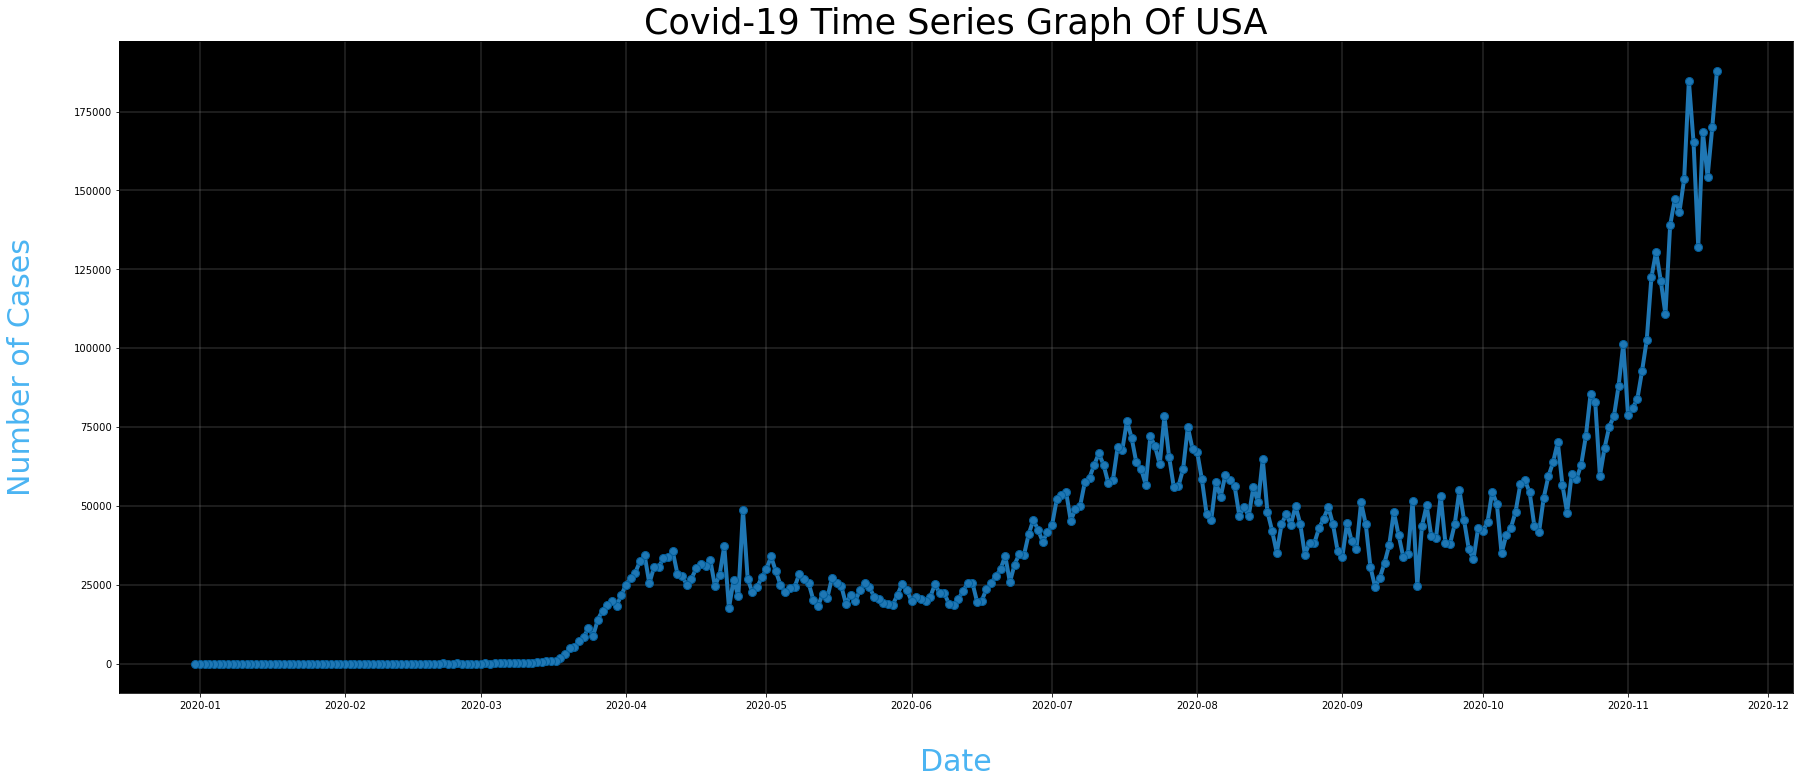

In [19]:
#No: of cases over time
us_data = data.loc[data["countriesAndTerritories"] == "United_States_of_America"]
X = us_data.date
Y = us_data.cases

plt.figure(figsize=(30,12))
ax = plt.axes() 
ax.grid(linewidth=0.4, color='#8f8f8f')  
  
ax.set_facecolor("black")  
ax.set_title("Covid-19 Time Series Graph Of USA", size=35)
ax.set_xlabel('\nDate',size=30,color='#4bb4f2') 
ax.set_ylabel('Number of Cases\n', 
              size=30,color='#4bb4f2') 
  
ax.plot(X,Y, 
        color='#1F77B4', 
        marker='o', 
        linewidth=4, 
        markersize=8, 
        markeredgecolor='#035E9B')

### Showing a Pie chart of most high case countries and continents 

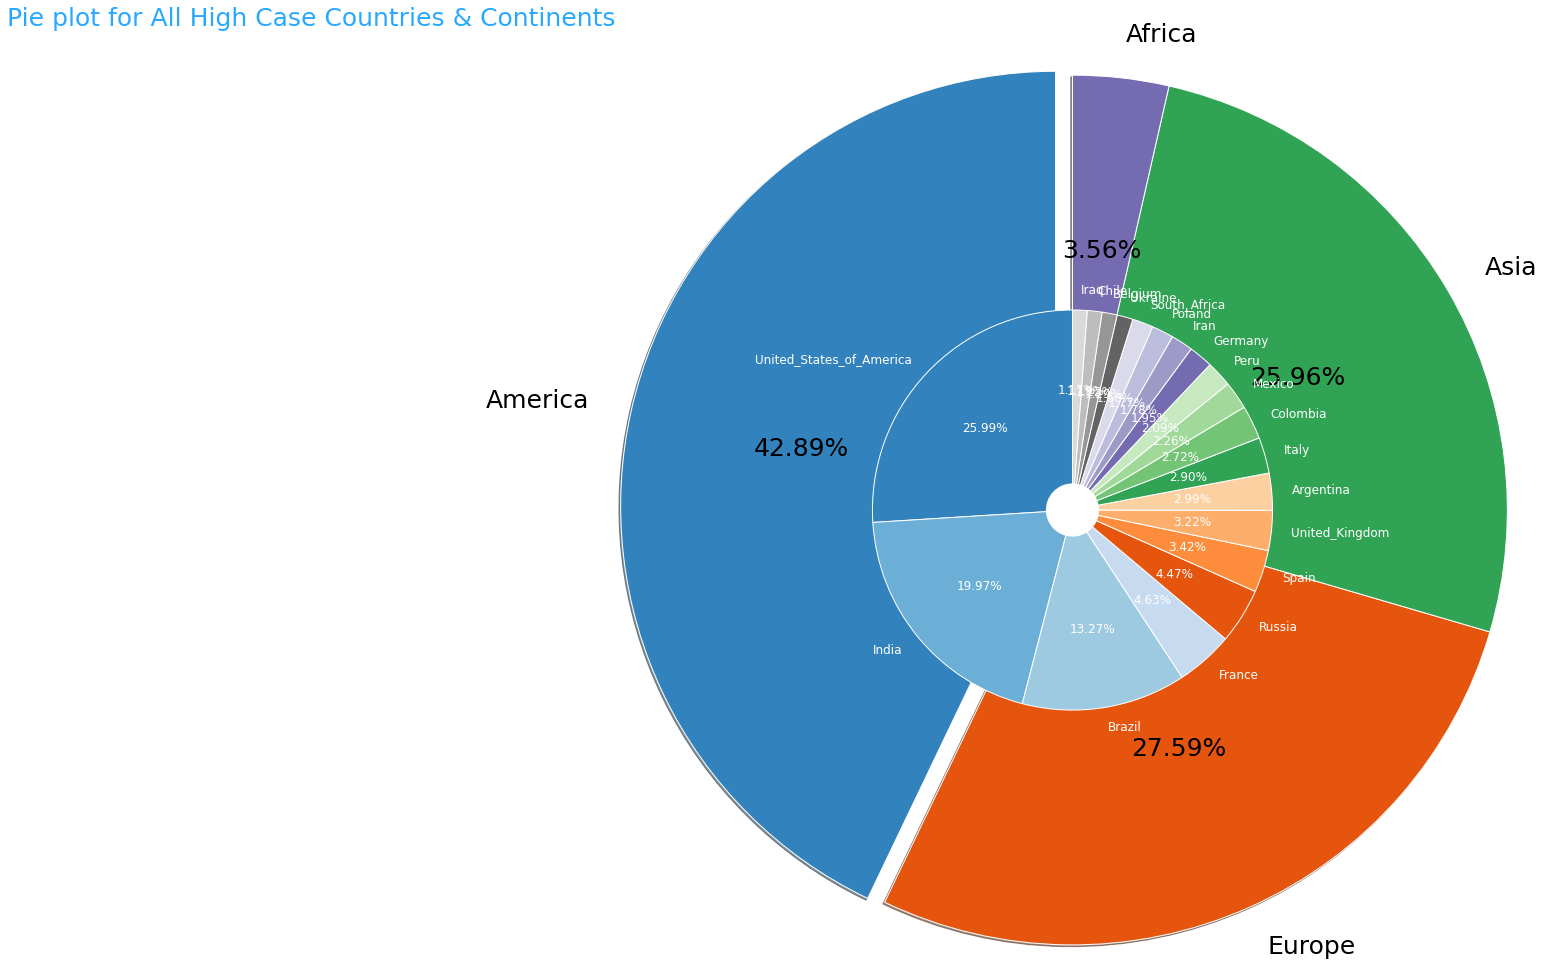

In [20]:
at_most_cases = 500000
#Outer chart shows continents
continent_cases = data.groupby(["continent"]).sum()
continent_cases.sort_values(by="cases", ascending=False, inplace=True)
continent_cases = continent_cases.loc[continent_cases["cases"] > at_most_cases]
out_continent_vals = continent_cases.cases
out_continent_names = continent_cases.reset_index()
out_continent_names = out_continent_names.continent

#Inner chart shows countries
country_cases = data.groupby(["countriesAndTerritories"]).sum()
country_cases.sort_values(by="cases", ascending=False, inplace=True)
country_cases = country_cases.loc[country_cases["cases"] > at_most_cases]
inn_country_vals = country_cases.cases
inn_country_names = country_cases.reset_index()
inn_country_names = inn_country_names.countriesAndTerritories

fig, ax = plt.subplots()
size = 2
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.arange(20))

ax.set_title('Pie plot for All High Case Countries & Continents', y=2.7, x=-3, size=25, color='#28a9ff')
ax.pie(out_continent_vals, radius=5, labels=out_continent_names, colors=outer_colors, textprops=dict(size=25, color="black"),
       shadow=True, explode=(0.2,0,0,0), autopct='%1.2f%%' , wedgeprops=dict(width=3, edgecolor='w'), startangle=90)

ax.pie(inn_country_vals, radius=2.3, labels=inn_country_names, colors=inner_colors, textprops=dict(size=12, color="white"),
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.2f%%', startangle=90)
plt.show()

### Showing a stacked Bar chart of Countries over no: of cases and deaths

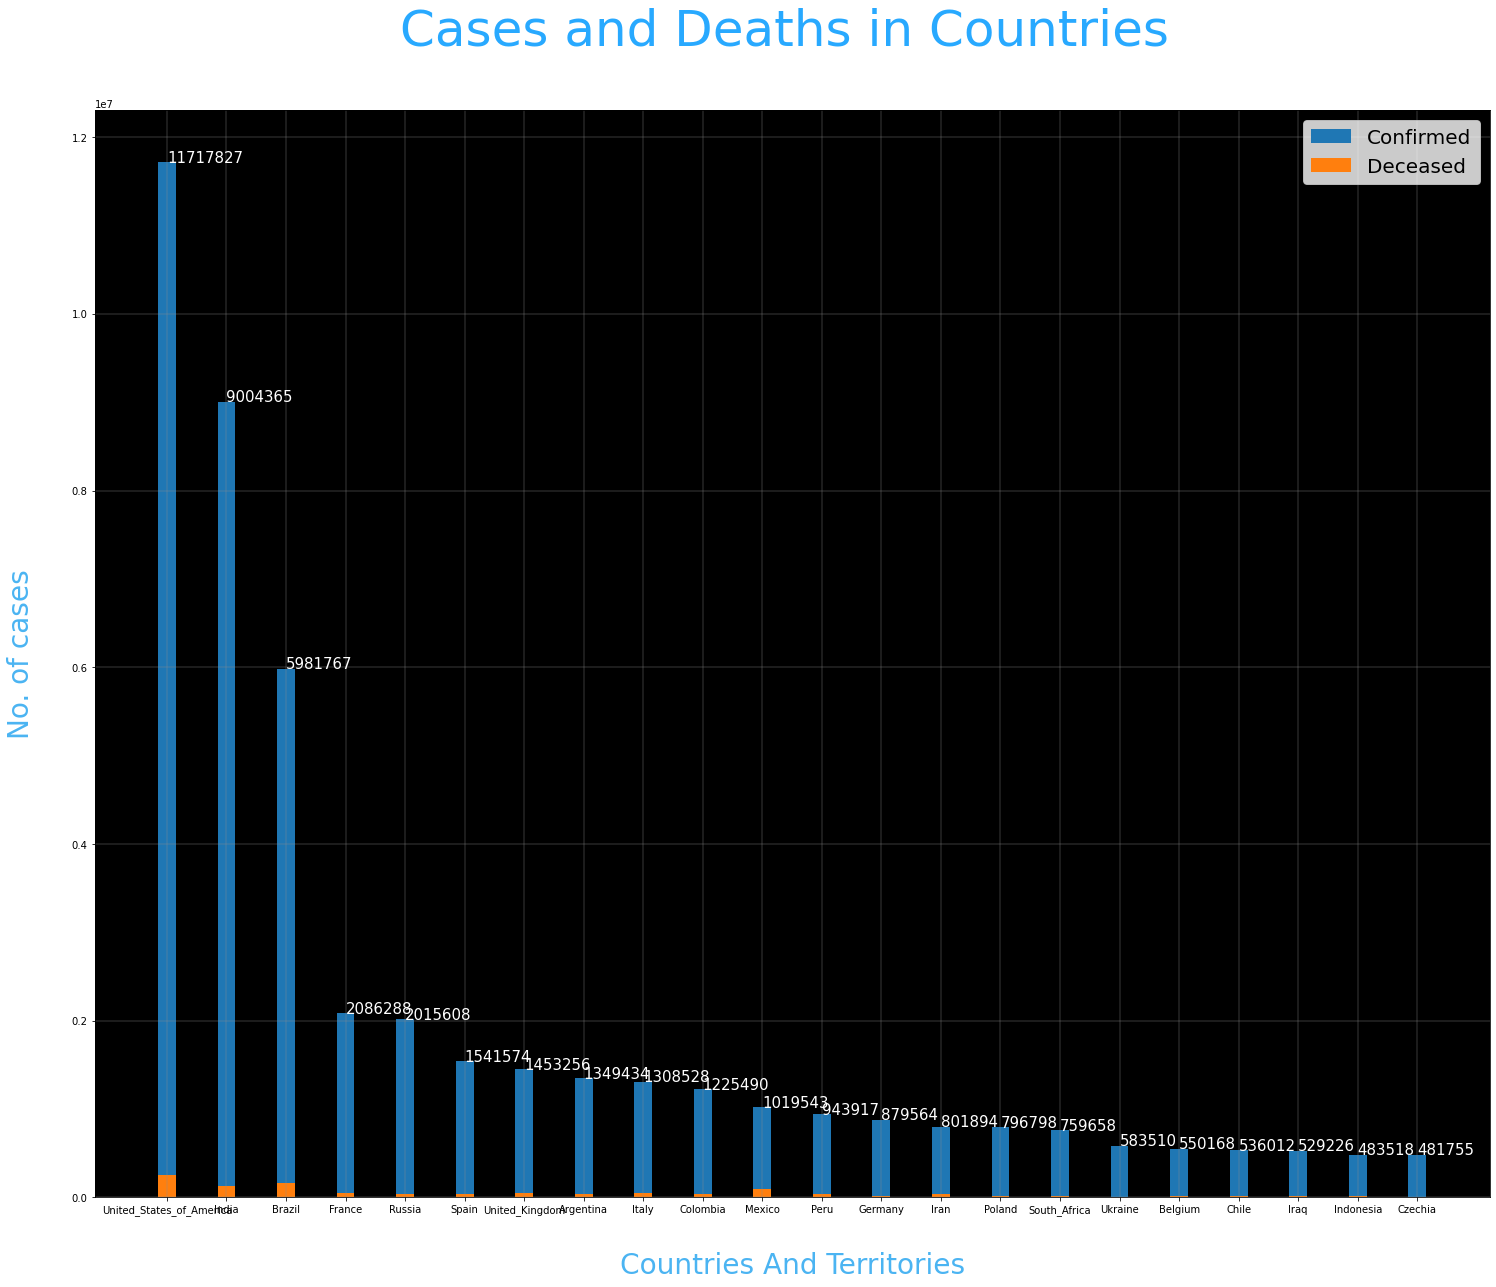

In [66]:
country_cases_deaths = data.groupby(["countriesAndTerritories"]).sum()
country_cases_deaths.sort_values(by="cases", ascending=False, inplace=True)
country_cases_deaths = country_cases_deaths.loc[country_cases_deaths["cases"] > 470000]

country_cases = country_cases_deaths.cases.values
country_deaths = country_cases_deaths.deaths.values

country_cases_deaths.reset_index(inplace=True)
X = country_cases_deaths.countriesAndTerritories.values
# X

plt.figure(figsize=(25, 20)) 
ax= plt.axes() 
  
ax.set_facecolor('black') 
ax.grid(linewidth=0.4, color='#8f8f8f') 
  
ax.set_xlabel('\nCountries And Territories', size=28, 
              color='#4bb4f2') 


ax.set_ylabel('No. of cases\n',size=28, 
              color='#4bb4f2') 
  
ax.set_title('Cases and Deaths in Countries \n', 
             size=50,color='#28a9ff') 
  
plt.bar(X,country_cases, width=0.3, align="center") 
plt.bar(X,country_deaths, width=0.3, align="center") 
  
for i,j in zip(X,country_cases): 
    ax.annotate(str(int(j)), 
                xy=(i,j+3), 
                color='white', 
                size='15') 
  
plt.legend(['Confirmed','Deceased'], 
           fontsize=20)

# 6.Executive Summary
    -Highlights of all the key findings 
    -Recommendations and justifications

After analyzing the data it was found out that the most covid effected countries are USA, India, Brazil and these countries still have been getting new covid cases as of the datasets latest date. It was also found out that the death percentage in relation to covid cases is relatively low as the most deaths are also in the top 3 effected countries. The Data also shows the coutries which have least to no recorded cases by the latest date, which suggests lots of coutries are surviving out of the covid phase. The charts also describe the overall scenerio of the worldwide covid cases.
    The data set can also be used to make some other types of analysis for further understanding of the data and can also be visualized in different ways to gather more information. but the overall analysis has proven to be informative.

# 7.References

1. Dataset Reference = European Centre for Disease Prevention and Control 
           -link = https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data
